<center> <h1> Universidad Pólitecnica Salesiana</h1></center>
<center> <h5>Estudiante: Angel Jadan</h5></center>
<center> <h5>Fecha: 06/06/2021</h5></center>


${Introducción} $
El siguiente trabajo trata de realizar una simulación del proceso de vacunación de la parroquia Jadan, de acuerdo al nuevo plan de vacunación planteado por el presidente Guillermo Laso. 
Tomaremos como datos, el número de votantes, el número de juntas o mesas, de acuerdo la última votación de las elecciones del 2021.

Para ello utilizaremos la libreria de simpy opensource, de python que nos permite realizar una simulación con un entorno virtual, que se pude representar como una maquina, u otro objeto, en este caso lo representaremos a la mesa o punto de vacunación donde se realizó la vacunación.


### Datos

#### Numero de vacunas recibidas en el Ecuador en las 2 semanas 950 000

Ciudad electoral tomado de referencia en elecciones 2021:
 ##### - Gualaceo.
 ##### - Población: 42617
 ##### - Numero de juntas: 135
 ##### - Fuente: http://portal.cne.gob.ec/documents/Estadisticas/cne_registro_electoral.pdf

 ##### - Recinto electoral: Jadan
 ##### - Número de juntas/mesas: 11
 ##### - Número de votantes: 4048
 ##### - Número de votantes por junta: 368
 ##### - Fuente: https://donde-vota.com/ecuador/azuay.htm


Se tomará en cuenta los tiempos en realizar los estudios, para ver si tiene sintomas, el tiempo que toma la primera y segunda dosis, que se detallan en el siguiente listado:

*	Tomar los resultados de la regresión para la vacuna según la llegada.
*	Se tiene una promedio que el 80% de personas realizaran el proceso de vacunación dentro del Ecuador.
*	Dentro del procesos se tiene que alrededor del 5% - 10% no podrán vacunarse.
*	Las personas solo tiene un recinto electoral para realizar el proceso.
*	Las personas realizan la primera vacuna y 30 días después la segunda vacuna.
*	La persona se acerca a la mesa  y hacen fila en caso de ser necesario para recibir la vacuna.
*	Realiza la vacunación en un tiempo aleatorio entre 5 a 10 minutos.
*	Debe esperar 20 minutos dentro del establecimiento para verificar que no tenga problemas de salud.
*	La persona recibe su certificado de vacunación y la fecha de la próxima vacuna entre 2 – 3 minutos.
*	La persona sale del recinto electoral.
*	Regresan para la próxima fecha y se repite el ciclo.
#### El proceso de simulación desarrollado deberá considerar los siguientes aspectos:
* Se debe establecer un modelo basado en modelos matemáticos para la predicción del numero de veces que se compartirá o la tendencia del presidente basada en redes sociales.
* El programa deberá generar gráficas que indiquen la ecuación matemática de las tendencias .
* Deben calcularse las siguientes métricas del sistema de simulación de eventos discretos :
 - Total de de personas que realizaron el proceso de vacunación.
 - Grafico del porcentaje de personas que no recibieron la vacuna.
 - El tiempo promedio de espera.


#### Importamos las librerias a utilizarse.

In [1]:
import simpy
import random
import matplotlib.pyplot as pp

%matplotlib inline

#### Realizamos la codificación para realizar el proceso de vacunación.
Se toma como 4050 vacunas disponibles, en un tiempo de 575 que es 5 dias.

In [26]:
# Maximo de vacunas
MAX_VACUNAS = 4050
# Total de numero de puntos de vacunacion
JUNTAS = 11
PACIENTES = 4048
# Intervalo de tiempo en que llegan los pacientes
INTERVALO = 20 #minutos
# Tiempo de simulación
TIEMPO_SIMULACION = 4075 #8 Dias

# Creamos un diccionario para almacenar las horas en que se vacuna los pacientes
tiempo_vacunacion={}
#Diccionarios para almacenar la primera y segunda dosis
dosis_1 ={}
dosis_2 = {}
#Diccionario para el numero de pacientes que no han sido atendidos
p_no_vacunado = []

#Numero de vacunas aplicadas
n_v_aplicadas = 0

#Fecha inicial 30 dias, y se suma 1 dia.
fecha_inicial =30


class Recinto(object):
    def __init__(self, environment, num_mesas, nombre):
        # Guardamos como variable el entorno de ejecucion
        self.env=environment
        # Creamos el recurso que representa las mesas o juntas 
        self.mesas = simpy.Resource(environment, num_mesas)
        self.nombre = nombre
        
    def examen_sintomas(self, paciente, tam_no_vacunados, n_per_sintomas):
        estado = random.randint(1,2)
        # Compara para ver que el numero de personas con sintomas en el diccionario
        # sea menor o igual al porcentaje generado y
        # el estado sea igual a 1 que es con sintomas
        if tam_no_vacunados<=n_per_sintomas and estado ==1:
            p_no_vacunado.append(paciente)
            
        return estado
    
    #Para traslado a la cama/silla de vacunacion y se inyecta
    def dosis_1(self, paciente, sintomas):
        if sintomas == 2:
            t_vacunacion = random.randint(5,10)
            yield self.env.timeout(t_vacunacion)
            print("El paciente ", paciente, " ha sido vacunado con la primera dosis.")
            print("La siguiente fecha es luego de 30 dias")
            
            dosis_1[paciente] = t_vacunacion
        else:
            print("El paciente ",paciente," tiene sintomas, por lo que no puede ser vacunado.")
    
    def dosis_2(self, paciente, sintomas):
        if sintomas ==2:
            t_vacunacion = random.randint(5,10)
            yield self.env.timeout(t_vacunacion)
            print("El paciente ",paciente, "ha sido vacunado con la segunda dosis.")
            dosis_2[paciente] = t_vacunacion
        else:
            print("El paciente ",paciente," tiene sintomas, por lo que no puede ser vacunado")
        
     #Traslado para la salida del paciente
    def generar_certificado(self,paciente, fecha_inicial):
        t_salida = random.randint(2,3)
        print("Se tiene que vacunar el : ",fecha_inicial)
        fecha_inicial+=1
        yield self.env.timeout(t_salida)
        

        
def llegada_paciente(env, paciente,punto,tam_no_vacunados, n_per_sintomas):
    # Usamos el reloj de la simulacion (env.now()) para indicar a la
    # hora que llega el vehiculo con el nombre pasado como parametro
    print('Llega el paciente: %s al minuto %.2f.' % (paciente, env.now))
 
    # Especificamos que vamos a usar un recurso (Resource) que representa # la maquina de lavado
    with punto.mesas.request() as mesa:
        # Ocupamos la mesa de vacunacion
        yield mesa
        
        #Indicamos que el paciente se esta trasladando para ser vacunado
        print('Se traslada el paciente: %s al minuto %.2f.' % (paciente,env.now))
        
        #yield env.process(punto.examen_sintomas(paciente,tam_no_vacunados, n_per_sintomas))
        sintomas = punto.examen_sintomas(paciente, tam_no_vacunados, n_per_sintomas)
        
        print("Sintomas: ",sintomas)
        if sintomas == 2:
            yield env.process(punto.dosis_1(paciente, sintomas))
            print("El paciente %s esta en proceso para la primera dosis a las  %.2f."\
                 %(paciente,env.now))
            
            yield env.process(punto.generar_certificado(paciente,fecha_inicial))
            print("Se ha generado el certificado y fecha para la segunda dosis a las %.2f. \
            para el paciente %s"\
                  %(env.now,paciente))
        if sintomas == 2:
            yield env.process(punto.dosis_2(paciente, sintomas))
            print("El paciente %s esta en proceso para la segunda dosis a las  %.2f." \
                  % (paciente,env.now))
        
 
 
def ejecutar_simulacion(env,num_mesas, pacientes,intervalo):
    recinto = Recinto(env,num_mesas,"Gualaceo")
    #Genarado randomico porcentaje entre 5% y 10%  con sintomas
    p_sintomas = random.randint(5,10)
    print("Porcentaje de personas que tienen sintomas: ",p_sintomas,"%")

    #Calculado numero de personas con sintomas
    n_per_sintomas = int(pacientes/100*p_sintomas)
    print("Numero de personas que tienen sintomas: ",n_per_sintomas)
    
    #Numero de personas no vacunadas
    tam_no_vacunados = len(p_no_vacunado)

    for i in range(pacientes):
        env.process(llegada_paciente(
            env,'Paciente-%d'%(i+1),recinto,tam_no_vacunados,n_per_sintomas))
    while True:
        
        yield env.timeout(random.randint(intervalo-2,intervalo+2))
        i+=1
        env.process(llegada_paciente(env,'Paciente-%d'%(i+1),recinto,tam_no_vacunados,n_per_sintomas))
        
print("Punto de vacunacion Jadan-Gualaceo")
# Creamos el entorno de simulacion
env=simpy.Environment()
print("Pacientes=> ", PACIENTES)
env.process(ejecutar_simulacion(env, JUNTAS,PACIENTES,INTERVALO))
# Ejecutamos el proceso durante el tiempo de simulacion
env.run(until = TIEMPO_SIMULACION)

Punto de vacunacion Jadan-Gualaceo
Pacientes=>  4048
Porcentaje de personas que tienen sintomas:  5 %
Numero de personas que tienen sintomas:  202
Llega el paciente: Paciente-1 al minuto 0.00.
Llega el paciente: Paciente-2 al minuto 0.00.
Llega el paciente: Paciente-3 al minuto 0.00.
Llega el paciente: Paciente-4 al minuto 0.00.
Llega el paciente: Paciente-5 al minuto 0.00.
Llega el paciente: Paciente-6 al minuto 0.00.
Llega el paciente: Paciente-7 al minuto 0.00.
Llega el paciente: Paciente-8 al minuto 0.00.
Llega el paciente: Paciente-9 al minuto 0.00.
Llega el paciente: Paciente-10 al minuto 0.00.
Llega el paciente: Paciente-11 al minuto 0.00.
Llega el paciente: Paciente-12 al minuto 0.00.
Llega el paciente: Paciente-13 al minuto 0.00.
Llega el paciente: Paciente-14 al minuto 0.00.
Llega el paciente: Paciente-15 al minuto 0.00.
Llega el paciente: Paciente-16 al minuto 0.00.
Llega el paciente: Paciente-17 al minuto 0.00.
Llega el paciente: Paciente-18 al minuto 0.00.
Llega el pacient

Llega el paciente: Paciente-1444 al minuto 0.00.
Llega el paciente: Paciente-1445 al minuto 0.00.
Llega el paciente: Paciente-1446 al minuto 0.00.
Llega el paciente: Paciente-1447 al minuto 0.00.
Llega el paciente: Paciente-1448 al minuto 0.00.
Llega el paciente: Paciente-1449 al minuto 0.00.
Llega el paciente: Paciente-1450 al minuto 0.00.
Llega el paciente: Paciente-1451 al minuto 0.00.
Llega el paciente: Paciente-1452 al minuto 0.00.
Llega el paciente: Paciente-1453 al minuto 0.00.
Llega el paciente: Paciente-1454 al minuto 0.00.
Llega el paciente: Paciente-1455 al minuto 0.00.
Llega el paciente: Paciente-1456 al minuto 0.00.
Llega el paciente: Paciente-1457 al minuto 0.00.
Llega el paciente: Paciente-1458 al minuto 0.00.
Llega el paciente: Paciente-1459 al minuto 0.00.
Llega el paciente: Paciente-1460 al minuto 0.00.
Llega el paciente: Paciente-1461 al minuto 0.00.
Llega el paciente: Paciente-1462 al minuto 0.00.
Llega el paciente: Paciente-1463 al minuto 0.00.
Llega el paciente: P

Llega el paciente: Paciente-2508 al minuto 0.00.
Llega el paciente: Paciente-2509 al minuto 0.00.
Llega el paciente: Paciente-2510 al minuto 0.00.
Llega el paciente: Paciente-2511 al minuto 0.00.
Llega el paciente: Paciente-2512 al minuto 0.00.
Llega el paciente: Paciente-2513 al minuto 0.00.
Llega el paciente: Paciente-2514 al minuto 0.00.
Llega el paciente: Paciente-2515 al minuto 0.00.
Llega el paciente: Paciente-2516 al minuto 0.00.
Llega el paciente: Paciente-2517 al minuto 0.00.
Llega el paciente: Paciente-2518 al minuto 0.00.
Llega el paciente: Paciente-2519 al minuto 0.00.
Llega el paciente: Paciente-2520 al minuto 0.00.
Llega el paciente: Paciente-2521 al minuto 0.00.
Llega el paciente: Paciente-2522 al minuto 0.00.
Llega el paciente: Paciente-2523 al minuto 0.00.
Llega el paciente: Paciente-2524 al minuto 0.00.
Llega el paciente: Paciente-2525 al minuto 0.00.
Llega el paciente: Paciente-2526 al minuto 0.00.
Llega el paciente: Paciente-2527 al minuto 0.00.
Llega el paciente: P

Llega el paciente: Paciente-3394 al minuto 0.00.
Llega el paciente: Paciente-3395 al minuto 0.00.
Llega el paciente: Paciente-3396 al minuto 0.00.
Llega el paciente: Paciente-3397 al minuto 0.00.
Llega el paciente: Paciente-3398 al minuto 0.00.
Llega el paciente: Paciente-3399 al minuto 0.00.
Llega el paciente: Paciente-3400 al minuto 0.00.
Llega el paciente: Paciente-3401 al minuto 0.00.
Llega el paciente: Paciente-3402 al minuto 0.00.
Llega el paciente: Paciente-3403 al minuto 0.00.
Llega el paciente: Paciente-3404 al minuto 0.00.
Llega el paciente: Paciente-3405 al minuto 0.00.
Llega el paciente: Paciente-3406 al minuto 0.00.
Llega el paciente: Paciente-3407 al minuto 0.00.
Llega el paciente: Paciente-3408 al minuto 0.00.
Llega el paciente: Paciente-3409 al minuto 0.00.
Llega el paciente: Paciente-3410 al minuto 0.00.
Llega el paciente: Paciente-3411 al minuto 0.00.
Llega el paciente: Paciente-3412 al minuto 0.00.
Llega el paciente: Paciente-3413 al minuto 0.00.
Llega el paciente: P

La siguiente fecha es luego de 30 dias
El paciente  Paciente-49 ha sido vacunado con la segunda dosis.
El paciente Paciente-58 esta en proceso para la primera dosis a las  61.00.
Se tiene que vacunar el :  30
El paciente Paciente-62 esta en proceso para la primera dosis a las  61.00.
Se tiene que vacunar el :  30
El paciente Paciente-49 esta en proceso para la segunda dosis a las  61.00.
Se traslada el paciente: Paciente-67 al minuto 61.00.
Sintomas:  1
Se traslada el paciente: Paciente-68 al minuto 61.00.
Sintomas:  2
El paciente  Paciente-52  ha sido vacunado con la primera dosis.
La siguiente fecha es luego de 30 dias
El paciente Paciente-52 esta en proceso para la primera dosis a las  62.00.
Se tiene que vacunar el :  30
Se ha generado el certificado y fecha para la segunda dosis a las 62.00.             para el paciente Paciente-53
Se ha generado el certificado y fecha para la segunda dosis a las 62.00.             para el paciente Paciente-54
El paciente  Paciente-56  ha sido vac

Sintomas:  2
Se traslada el paciente: Paciente-179 al minuto 148.00.
Sintomas:  1
Se traslada el paciente: Paciente-180 al minuto 148.00.
Sintomas:  2
El paciente  Paciente-155 ha sido vacunado con la segunda dosis.
El paciente Paciente-155 esta en proceso para la segunda dosis a las  149.00.
Se traslada el paciente: Paciente-181 al minuto 149.00.
Sintomas:  2
El paciente  Paciente-160 ha sido vacunado con la segunda dosis.
El paciente  Paciente-172  ha sido vacunado con la primera dosis.
La siguiente fecha es luego de 30 dias
El paciente Paciente-160 esta en proceso para la segunda dosis a las  150.00.
El paciente Paciente-172 esta en proceso para la primera dosis a las  150.00.
Se tiene que vacunar el :  30
Se ha generado el certificado y fecha para la segunda dosis a las 150.00.             para el paciente Paciente-169
Se traslada el paciente: Paciente-182 al minuto 150.00.
Sintomas:  2
Llega el paciente: Paciente-4056 al minuto 152.00.
El paciente  Paciente-171  ha sido vacunado c

El paciente  Paciente-230 ha sido vacunado con la segunda dosis.
El paciente Paciente-241 esta en proceso para la primera dosis a las  202.00.
Se tiene que vacunar el :  30
El paciente Paciente-230 esta en proceso para la segunda dosis a las  202.00.
Se traslada el paciente: Paciente-250 al minuto 202.00.
Sintomas:  2
El paciente  Paciente-231 ha sido vacunado con la segunda dosis.
El paciente  Paciente-244  ha sido vacunado con la primera dosis.
La siguiente fecha es luego de 30 dias
El paciente Paciente-231 esta en proceso para la segunda dosis a las  203.00.
El paciente Paciente-244 esta en proceso para la primera dosis a las  203.00.
Se tiene que vacunar el :  30
Se traslada el paciente: Paciente-251 al minuto 203.00.
Sintomas:  2
Se ha generado el certificado y fecha para la segunda dosis a las 204.00.             para el paciente Paciente-242
El paciente  Paciente-243  ha sido vacunado con la primera dosis.
La siguiente fecha es luego de 30 dias
El paciente Paciente-243 esta en p

El paciente  Paciente-366 ha sido vacunado con la segunda dosis.
El paciente  Paciente-373 ha sido vacunado con la segunda dosis.
El paciente Paciente-366 esta en proceso para la segunda dosis a las  314.00.
El paciente Paciente-373 esta en proceso para la segunda dosis a las  314.00.
Se traslada el paciente: Paciente-380 al minuto 314.00.
Sintomas:  1
Se traslada el paciente: Paciente-381 al minuto 314.00.
Sintomas:  1
Se traslada el paciente: Paciente-382 al minuto 314.00.
Sintomas:  2
Se traslada el paciente: Paciente-383 al minuto 314.00.
Sintomas:  1
Se traslada el paciente: Paciente-384 al minuto 314.00.
Sintomas:  1
Se traslada el paciente: Paciente-385 al minuto 314.00.
Sintomas:  2
El paciente  Paciente-371 ha sido vacunado con la segunda dosis.
El paciente  Paciente-374 ha sido vacunado con la segunda dosis.
El paciente Paciente-371 esta en proceso para la segunda dosis a las  315.00.
El paciente Paciente-374 esta en proceso para la segunda dosis a las  315.00.
Se ha generado

Sintomas:  2
El paciente  Paciente-504  ha sido vacunado con la primera dosis.
La siguiente fecha es luego de 30 dias
El paciente  Paciente-507  ha sido vacunado con la primera dosis.
La siguiente fecha es luego de 30 dias
El paciente Paciente-504 esta en proceso para la primera dosis a las  418.00.
Se tiene que vacunar el :  30
El paciente Paciente-507 esta en proceso para la primera dosis a las  418.00.
Se tiene que vacunar el :  30
Se ha generado el certificado y fecha para la segunda dosis a las 418.00.             para el paciente Paciente-502
Se ha generado el certificado y fecha para la segunda dosis a las 419.00.             para el paciente Paciente-506
Se ha generado el certificado y fecha para la segunda dosis a las 420.00.             para el paciente Paciente-504
El paciente  Paciente-495 ha sido vacunado con la segunda dosis.
El paciente  Paciente-498 ha sido vacunado con la segunda dosis.
El paciente Paciente-495 esta en proceso para la segunda dosis a las  421.00.
El pa

El paciente  Paciente-620 ha sido vacunado con la segunda dosis.
El paciente  Paciente-622 ha sido vacunado con la segunda dosis.
El paciente  Paciente-631  ha sido vacunado con la primera dosis.
La siguiente fecha es luego de 30 dias
El paciente Paciente-620 esta en proceso para la segunda dosis a las  529.00.
El paciente Paciente-622 esta en proceso para la segunda dosis a las  529.00.
El paciente Paciente-631 esta en proceso para la primera dosis a las  529.00.
Se tiene que vacunar el :  30
Se traslada el paciente: Paciente-640 al minuto 529.00.
Sintomas:  1
Se traslada el paciente: Paciente-641 al minuto 529.00.
Sintomas:  2
Se traslada el paciente: Paciente-642 al minuto 529.00.
Sintomas:  2
El paciente  Paciente-632  ha sido vacunado con la primera dosis.
La siguiente fecha es luego de 30 dias
El paciente Paciente-632 esta en proceso para la primera dosis a las  530.00.
Se tiene que vacunar el :  30
Llega el paciente: Paciente-4075 al minuto 531.00.
El paciente  Paciente-619 ha s

Se traslada el paciente: Paciente-724 al minuto 595.00.
Sintomas:  1
Se traslada el paciente: Paciente-725 al minuto 595.00.
Sintomas:  1
Se traslada el paciente: Paciente-726 al minuto 595.00.
Sintomas:  2
El paciente  Paciente-713  ha sido vacunado con la primera dosis.
La siguiente fecha es luego de 30 dias
El paciente Paciente-713 esta en proceso para la primera dosis a las  597.00.
Se tiene que vacunar el :  30
Se ha generado el certificado y fecha para la segunda dosis a las 597.00.             para el paciente Paciente-711
El paciente  Paciente-712  ha sido vacunado con la primera dosis.
La siguiente fecha es luego de 30 dias
El paciente Paciente-712 esta en proceso para la primera dosis a las  598.00.
Se tiene que vacunar el :  30
El paciente  Paciente-715  ha sido vacunado con la primera dosis.
La siguiente fecha es luego de 30 dias
El paciente Paciente-715 esta en proceso para la primera dosis a las  599.00.
Se tiene que vacunar el :  30
El paciente  Paciente-717  ha sido vac

Se traslada el paciente: Paciente-834 al minuto 693.00.
Sintomas:  1
Se traslada el paciente: Paciente-835 al minuto 693.00.
Sintomas:  1
Se traslada el paciente: Paciente-836 al minuto 693.00.
Sintomas:  1
Se traslada el paciente: Paciente-837 al minuto 693.00.
Sintomas:  1
Se traslada el paciente: Paciente-838 al minuto 693.00.
Sintomas:  2
Se traslada el paciente: Paciente-839 al minuto 693.00.
Sintomas:  1
Se traslada el paciente: Paciente-840 al minuto 693.00.
Sintomas:  2
Se traslada el paciente: Paciente-841 al minuto 693.00.
Sintomas:  1
Se traslada el paciente: Paciente-842 al minuto 693.00.
Sintomas:  1
Se traslada el paciente: Paciente-843 al minuto 693.00.
Sintomas:  2
El paciente  Paciente-829  ha sido vacunado con la primera dosis.
La siguiente fecha es luego de 30 dias
El paciente Paciente-829 esta en proceso para la primera dosis a las  694.00.
Se tiene que vacunar el :  30
Se ha generado el certificado y fecha para la segunda dosis a las 694.00.             para el pac

El paciente  Paciente-953  ha sido vacunado con la primera dosis.
La siguiente fecha es luego de 30 dias
El paciente Paciente-943 esta en proceso para la segunda dosis a las  784.00.
El paciente Paciente-947 esta en proceso para la segunda dosis a las  784.00.
El paciente Paciente-953 esta en proceso para la primera dosis a las  784.00.
Se tiene que vacunar el :  30
Se traslada el paciente: Paciente-960 al minuto 784.00.
Sintomas:  1
Se traslada el paciente: Paciente-961 al minuto 784.00.
Sintomas:  1
Se traslada el paciente: Paciente-962 al minuto 784.00.
Sintomas:  1
Se traslada el paciente: Paciente-963 al minuto 784.00.
Sintomas:  2
Se traslada el paciente: Paciente-964 al minuto 784.00.
Sintomas:  2
Se ha generado el certificado y fecha para la segunda dosis a las 785.00.             para el paciente Paciente-951
El paciente  Paciente-954  ha sido vacunado con la primera dosis.
La siguiente fecha es luego de 30 dias
El paciente  Paciente-955  ha sido vacunado con la primera dosis.

El paciente  Paciente-1088 ha sido vacunado con la segunda dosis.
El paciente Paciente-1091 esta en proceso para la primera dosis a las  899.00.
Se tiene que vacunar el :  30
El paciente Paciente-1088 esta en proceso para la segunda dosis a las  899.00.
Se ha generado el certificado y fecha para la segunda dosis a las 899.00.             para el paciente Paciente-1090
Se traslada el paciente: Paciente-1098 al minuto 899.00.
Sintomas:  1
Se traslada el paciente: Paciente-1099 al minuto 899.00.
Sintomas:  1
Se traslada el paciente: Paciente-1100 al minuto 899.00.
Sintomas:  2
El paciente  Paciente-1081 ha sido vacunado con la segunda dosis.
El paciente  Paciente-1086 ha sido vacunado con la segunda dosis.
El paciente Paciente-1081 esta en proceso para la segunda dosis a las  900.00.
El paciente Paciente-1086 esta en proceso para la segunda dosis a las  900.00.
Se traslada el paciente: Paciente-1101 al minuto 900.00.
Sintomas:  1
Se traslada el paciente: Paciente-1102 al minuto 900.00.
Si

Sintomas:  2
Se traslada el paciente: Paciente-1208 al minuto 975.00.
Sintomas:  2
El paciente  Paciente-1183 ha sido vacunado con la segunda dosis.
El paciente  Paciente-1189 ha sido vacunado con la segunda dosis.
El paciente Paciente-1183 esta en proceso para la segunda dosis a las  976.00.
El paciente Paciente-1189 esta en proceso para la segunda dosis a las  976.00.
Se traslada el paciente: Paciente-1209 al minuto 976.00.
Sintomas:  2
Se traslada el paciente: Paciente-1210 al minuto 976.00.
Sintomas:  1
Se traslada el paciente: Paciente-1211 al minuto 976.00.
Sintomas:  2
El paciente  Paciente-1196  ha sido vacunado con la primera dosis.
La siguiente fecha es luego de 30 dias
El paciente  Paciente-1193 ha sido vacunado con la segunda dosis.
El paciente  Paciente-1203  ha sido vacunado con la primera dosis.
La siguiente fecha es luego de 30 dias
El paciente Paciente-1196 esta en proceso para la primera dosis a las  977.00.
Se tiene que vacunar el :  30
El paciente Paciente-1193 esta

La siguiente fecha es luego de 30 dias
El paciente  Paciente-1369  ha sido vacunado con la primera dosis.
La siguiente fecha es luego de 30 dias
El paciente Paciente-1367 esta en proceso para la primera dosis a las  1121.00.
Se tiene que vacunar el :  30
El paciente Paciente-1369 esta en proceso para la primera dosis a las  1121.00.
Se tiene que vacunar el :  30
Se ha generado el certificado y fecha para la segunda dosis a las 1122.00.             para el paciente Paciente-1368
Se ha generado el certificado y fecha para la segunda dosis a las 1122.00.             para el paciente Paciente-1366
El paciente  Paciente-1372  ha sido vacunado con la primera dosis.
La siguiente fecha es luego de 30 dias
El paciente Paciente-1372 esta en proceso para la primera dosis a las  1123.00.
Se tiene que vacunar el :  30
Se ha generado el certificado y fecha para la segunda dosis a las 1123.00.             para el paciente Paciente-1367
Se ha generado el certificado y fecha para la segunda dosis a las

El paciente  Paciente-1507  ha sido vacunado con la primera dosis.
La siguiente fecha es luego de 30 dias
El paciente  Paciente-1487 ha sido vacunado con la segunda dosis.
El paciente  Paciente-1508  ha sido vacunado con la primera dosis.
La siguiente fecha es luego de 30 dias
El paciente Paciente-1507 esta en proceso para la primera dosis a las  1233.00.
Se tiene que vacunar el :  30
El paciente Paciente-1487 esta en proceso para la segunda dosis a las  1233.00.
El paciente Paciente-1508 esta en proceso para la primera dosis a las  1233.00.
Se tiene que vacunar el :  30
Se traslada el paciente: Paciente-1514 al minuto 1233.00.
Sintomas:  1
Se traslada el paciente: Paciente-1515 al minuto 1233.00.
Sintomas:  1
Se traslada el paciente: Paciente-1516 al minuto 1233.00.
Sintomas:  1
Se traslada el paciente: Paciente-1517 al minuto 1233.00.
Sintomas:  2
Se ha generado el certificado y fecha para la segunda dosis a las 1235.00.             para el paciente Paciente-1507
Se ha generado el ce

Llega el paciente: Paciente-4116 al minuto 1374.00.
El paciente  Paciente-1710  ha sido vacunado con la primera dosis.
La siguiente fecha es luego de 30 dias
El paciente Paciente-1710 esta en proceso para la primera dosis a las  1374.00.
Se tiene que vacunar el :  30
El paciente  Paciente-1705 ha sido vacunado con la segunda dosis.
El paciente  Paciente-1702 ha sido vacunado con la segunda dosis.
El paciente  Paciente-1700 ha sido vacunado con la segunda dosis.
El paciente  Paciente-1706 ha sido vacunado con la segunda dosis.
El paciente  Paciente-1712  ha sido vacunado con la primera dosis.
La siguiente fecha es luego de 30 dias
El paciente Paciente-1705 esta en proceso para la segunda dosis a las  1375.00.
El paciente Paciente-1702 esta en proceso para la segunda dosis a las  1375.00.
El paciente Paciente-1700 esta en proceso para la segunda dosis a las  1375.00.
El paciente Paciente-1706 esta en proceso para la segunda dosis a las  1375.00.
El paciente Paciente-1712 esta en proceso 

Sintomas:  2
El paciente  Paciente-1817  ha sido vacunado con la primera dosis.
La siguiente fecha es luego de 30 dias
El paciente  Paciente-1808 ha sido vacunado con la segunda dosis.
El paciente Paciente-1817 esta en proceso para la primera dosis a las  1469.00.
Se tiene que vacunar el :  30
El paciente Paciente-1808 esta en proceso para la segunda dosis a las  1469.00.
Se traslada el paciente: Paciente-1823 al minuto 1469.00.
Sintomas:  1
Se traslada el paciente: Paciente-1824 al minuto 1469.00.
Sintomas:  1
Se traslada el paciente: Paciente-1825 al minuto 1469.00.
Sintomas:  2
El paciente  Paciente-1809 ha sido vacunado con la segunda dosis.
El paciente Paciente-1809 esta en proceso para la segunda dosis a las  1470.00.
Se ha generado el certificado y fecha para la segunda dosis a las 1470.00.             para el paciente Paciente-1816
Se ha generado el certificado y fecha para la segunda dosis a las 1470.00.             para el paciente Paciente-1818
Se traslada el paciente: Pacie

El paciente  Paciente-1969 ha sido vacunado con la segunda dosis.
El paciente Paciente-1969 esta en proceso para la segunda dosis a las  1600.00.
Se ha generado el certificado y fecha para la segunda dosis a las 1600.00.             para el paciente Paciente-1974
Se traslada el paciente: Paciente-1983 al minuto 1600.00.
Sintomas:  1
Se traslada el paciente: Paciente-1984 al minuto 1600.00.
Sintomas:  2
El paciente  Paciente-1975  ha sido vacunado con la primera dosis.
La siguiente fecha es luego de 30 dias
El paciente  Paciente-1978  ha sido vacunado con la primera dosis.
La siguiente fecha es luego de 30 dias
El paciente Paciente-1975 esta en proceso para la primera dosis a las  1602.00.
Se tiene que vacunar el :  30
El paciente Paciente-1978 esta en proceso para la primera dosis a las  1602.00.
Se tiene que vacunar el :  30
El paciente  Paciente-1971 ha sido vacunado con la segunda dosis.
El paciente Paciente-1971 esta en proceso para la segunda dosis a las  1604.00.
Se ha generado e

Sintomas:  1
Se traslada el paciente: Paciente-2078 al minuto 1678.00.
Sintomas:  1
Se traslada el paciente: Paciente-2079 al minuto 1678.00.
Sintomas:  2
El paciente  Paciente-2065  ha sido vacunado con la primera dosis.
La siguiente fecha es luego de 30 dias
El paciente Paciente-2065 esta en proceso para la primera dosis a las  1679.00.
Se tiene que vacunar el :  30
El paciente  Paciente-2064  ha sido vacunado con la primera dosis.
La siguiente fecha es luego de 30 dias
El paciente  Paciente-2060 ha sido vacunado con la segunda dosis.
El paciente Paciente-2064 esta en proceso para la primera dosis a las  1680.00.
Se tiene que vacunar el :  30
El paciente Paciente-2060 esta en proceso para la segunda dosis a las  1680.00.
Se traslada el paciente: Paciente-2080 al minuto 1680.00.
Sintomas:  1
Se traslada el paciente: Paciente-2081 al minuto 1680.00.
Sintomas:  2
El paciente  Paciente-2057 ha sido vacunado con la segunda dosis.
El paciente  Paciente-2072  ha sido vacunado con la primera

El paciente Paciente-2193 esta en proceso para la primera dosis a las  1776.00.
Se tiene que vacunar el :  30
El paciente  Paciente-2190 ha sido vacunado con la segunda dosis.
El paciente Paciente-2190 esta en proceso para la segunda dosis a las  1777.00.
Se ha generado el certificado y fecha para la segunda dosis a las 1777.00.             para el paciente Paciente-2195
Se ha generado el certificado y fecha para la segunda dosis a las 1777.00.             para el paciente Paciente-2194
Se traslada el paciente: Paciente-2202 al minuto 1777.00.
Sintomas:  2
El paciente  Paciente-2177 ha sido vacunado con la segunda dosis.
El paciente  Paciente-2186 ha sido vacunado con la segunda dosis.
El paciente Paciente-2177 esta en proceso para la segunda dosis a las  1778.00.
El paciente Paciente-2186 esta en proceso para la segunda dosis a las  1778.00.
Se ha generado el certificado y fecha para la segunda dosis a las 1778.00.             para el paciente Paciente-2193
Se traslada el paciente: Pa

El paciente Paciente-2328 esta en proceso para la segunda dosis a las  1893.00.
Se ha generado el certificado y fecha para la segunda dosis a las 1893.00.             para el paciente Paciente-2346
Se traslada el paciente: Paciente-2354 al minuto 1893.00.
Sintomas:  1
Se traslada el paciente: Paciente-2355 al minuto 1893.00.
Sintomas:  2
Llega el paciente: Paciente-4142 al minuto 1894.00.
Se ha generado el certificado y fecha para la segunda dosis a las 1894.00.             para el paciente Paciente-2338
El paciente  Paciente-2335 ha sido vacunado con la segunda dosis.
El paciente  Paciente-2345 ha sido vacunado con la segunda dosis.
El paciente Paciente-2335 esta en proceso para la segunda dosis a las  1896.00.
El paciente Paciente-2345 esta en proceso para la segunda dosis a las  1896.00.
Se traslada el paciente: Paciente-2356 al minuto 1896.00.
Sintomas:  2
Se traslada el paciente: Paciente-2357 al minuto 1896.00.
Sintomas:  1
Se traslada el paciente: Paciente-2358 al minuto 1896.00

El paciente Paciente-2500 esta en proceso para la primera dosis a las  2006.00.
Se tiene que vacunar el :  30
El paciente Paciente-2502 esta en proceso para la primera dosis a las  2006.00.
Se tiene que vacunar el :  30
El paciente  Paciente-2481 ha sido vacunado con la segunda dosis.
El paciente  Paciente-2485 ha sido vacunado con la segunda dosis.
El paciente Paciente-2481 esta en proceso para la segunda dosis a las  2007.00.
El paciente Paciente-2485 esta en proceso para la segunda dosis a las  2007.00.
Se ha generado el certificado y fecha para la segunda dosis a las 2007.00.             para el paciente Paciente-2499
Se traslada el paciente: Paciente-2505 al minuto 2007.00.
Sintomas:  1
Se traslada el paciente: Paciente-2506 al minuto 2007.00.
Sintomas:  2
Se traslada el paciente: Paciente-2507 al minuto 2007.00.
Sintomas:  1
Se traslada el paciente: Paciente-2508 al minuto 2007.00.
Sintomas:  1
Se traslada el paciente: Paciente-2509 al minuto 2007.00.
Sintomas:  1
Se traslada el 

La siguiente fecha es luego de 30 dias
El paciente  Paciente-2629 ha sido vacunado con la segunda dosis.
El paciente Paciente-2636 esta en proceso para la primera dosis a las  2115.00.
Se tiene que vacunar el :  30
El paciente Paciente-2643 esta en proceso para la primera dosis a las  2115.00.
Se tiene que vacunar el :  30
El paciente Paciente-2629 esta en proceso para la segunda dosis a las  2115.00.
Se ha generado el certificado y fecha para la segunda dosis a las 2115.00.             para el paciente Paciente-2650
Se traslada el paciente: Paciente-2652 al minuto 2115.00.
Sintomas:  2
El paciente  Paciente-2639  ha sido vacunado con la primera dosis.
La siguiente fecha es luego de 30 dias
El paciente Paciente-2639 esta en proceso para la primera dosis a las  2116.00.
Se tiene que vacunar el :  30
Se ha generado el certificado y fecha para la segunda dosis a las 2116.00.             para el paciente Paciente-2638
El paciente  Paciente-2651  ha sido vacunado con la primera dosis.
La si

Se tiene que vacunar el :  30
El paciente  Paciente-2798 ha sido vacunado con la segunda dosis.
El paciente Paciente-2798 esta en proceso para la segunda dosis a las  2255.00.
Se ha generado el certificado y fecha para la segunda dosis a las 2255.00.             para el paciente Paciente-2806
Se ha generado el certificado y fecha para la segunda dosis a las 2255.00.             para el paciente Paciente-2808
Se traslada el paciente: Paciente-2819 al minuto 2255.00.
Sintomas:  1
Se traslada el paciente: Paciente-2820 al minuto 2255.00.
Sintomas:  2
Se ha generado el certificado y fecha para la segunda dosis a las 2256.00.             para el paciente Paciente-2804
Se ha generado el certificado y fecha para la segunda dosis a las 2256.00.             para el paciente Paciente-2807
Se ha generado el certificado y fecha para la segunda dosis a las 2256.00.             para el paciente Paciente-2811
El paciente  Paciente-2816  ha sido vacunado con la primera dosis.
La siguiente fecha es lue

Se ha generado el certificado y fecha para la segunda dosis a las 2380.00.             para el paciente Paciente-2978
Se ha generado el certificado y fecha para la segunda dosis a las 2380.00.             para el paciente Paciente-2991
Se traslada el paciente: Paciente-3000 al minuto 2380.00.
Sintomas:  2
El paciente  Paciente-2996  ha sido vacunado con la primera dosis.
La siguiente fecha es luego de 30 dias
El paciente  Paciente-2999  ha sido vacunado con la primera dosis.
La siguiente fecha es luego de 30 dias
El paciente Paciente-2996 esta en proceso para la primera dosis a las  2381.00.
Se tiene que vacunar el :  30
El paciente Paciente-2999 esta en proceso para la primera dosis a las  2381.00.
Se tiene que vacunar el :  30
Se ha generado el certificado y fecha para la segunda dosis a las 2381.00.             para el paciente Paciente-2994
Se ha generado el certificado y fecha para la segunda dosis a las 2381.00.             para el paciente Paciente-2984
Se ha generado el certifi

Se traslada el paciente: Paciente-3115 al minuto 2465.00.
Sintomas:  1
Se traslada el paciente: Paciente-3116 al minuto 2465.00.
Sintomas:  1
Se traslada el paciente: Paciente-3117 al minuto 2465.00.
Sintomas:  2
El paciente  Paciente-3107  ha sido vacunado con la primera dosis.
La siguiente fecha es luego de 30 dias
El paciente  Paciente-3109  ha sido vacunado con la primera dosis.
La siguiente fecha es luego de 30 dias
El paciente Paciente-3107 esta en proceso para la primera dosis a las  2466.00.
Se tiene que vacunar el :  30
El paciente Paciente-3109 esta en proceso para la primera dosis a las  2466.00.
Se tiene que vacunar el :  30
Se ha generado el certificado y fecha para la segunda dosis a las 2466.00.             para el paciente Paciente-3104
Se ha generado el certificado y fecha para la segunda dosis a las 2468.00.             para el paciente Paciente-3102
El paciente  Paciente-3100 ha sido vacunado con la segunda dosis.
El paciente  Paciente-3114  ha sido vacunado con la p

El paciente  Paciente-3206  ha sido vacunado con la primera dosis.
La siguiente fecha es luego de 30 dias
El paciente  Paciente-3201 ha sido vacunado con la segunda dosis.
El paciente  Paciente-3203 ha sido vacunado con la segunda dosis.
El paciente  Paciente-3211  ha sido vacunado con la primera dosis.
La siguiente fecha es luego de 30 dias
El paciente Paciente-3206 esta en proceso para la primera dosis a las  2559.00.
Se tiene que vacunar el :  30
El paciente Paciente-3201 esta en proceso para la segunda dosis a las  2559.00.
El paciente Paciente-3203 esta en proceso para la segunda dosis a las  2559.00.
El paciente Paciente-3211 esta en proceso para la primera dosis a las  2559.00.
Se tiene que vacunar el :  30
Se ha generado el certificado y fecha para la segunda dosis a las 2559.00.             para el paciente Paciente-3208
Se ha generado el certificado y fecha para la segunda dosis a las 2559.00.             para el paciente Paciente-3210
Se traslada el paciente: Paciente-3219 a

Se traslada el paciente: Paciente-3355 al minuto 2666.00.
Sintomas:  2
El paciente  Paciente-3351  ha sido vacunado con la primera dosis.
La siguiente fecha es luego de 30 dias
El paciente  Paciente-3332 ha sido vacunado con la segunda dosis.
El paciente  Paciente-3353  ha sido vacunado con la primera dosis.
La siguiente fecha es luego de 30 dias
El paciente Paciente-3351 esta en proceso para la primera dosis a las  2667.00.
Se tiene que vacunar el :  30
El paciente Paciente-3332 esta en proceso para la segunda dosis a las  2667.00.
El paciente Paciente-3353 esta en proceso para la primera dosis a las  2667.00.
Se tiene que vacunar el :  30
Se ha generado el certificado y fecha para la segunda dosis a las 2667.00.             para el paciente Paciente-3339
Se traslada el paciente: Paciente-3356 al minuto 2667.00.
Sintomas:  2
El paciente  Paciente-3346  ha sido vacunado con la primera dosis.
La siguiente fecha es luego de 30 dias
El paciente Paciente-3346 esta en proceso para la primer

Sintomas:  1
Se traslada el paciente: Paciente-3473 al minuto 2768.00.
Sintomas:  1
Se traslada el paciente: Paciente-3474 al minuto 2768.00.
Sintomas:  2
Se ha generado el certificado y fecha para la segunda dosis a las 2769.00.             para el paciente Paciente-3465
Se ha generado el certificado y fecha para la segunda dosis a las 2769.00.             para el paciente Paciente-3469
El paciente  Paciente-3468  ha sido vacunado con la primera dosis.
La siguiente fecha es luego de 30 dias
El paciente  Paciente-3471  ha sido vacunado con la primera dosis.
La siguiente fecha es luego de 30 dias
El paciente Paciente-3468 esta en proceso para la primera dosis a las  2770.00.
Se tiene que vacunar el :  30
El paciente Paciente-3471 esta en proceso para la primera dosis a las  2770.00.
Se tiene que vacunar el :  30
Se ha generado el certificado y fecha para la segunda dosis a las 2770.00.             para el paciente Paciente-3467
El paciente  Paciente-3470  ha sido vacunado con la primera

El paciente  Paciente-3584 ha sido vacunado con la segunda dosis.
El paciente Paciente-3586 esta en proceso para la primera dosis a las  2867.00.
Se tiene que vacunar el :  30
El paciente Paciente-3584 esta en proceso para la segunda dosis a las  2867.00.
Se traslada el paciente: Paciente-3597 al minuto 2867.00.
Sintomas:  2
El paciente  Paciente-3563 ha sido vacunado con la segunda dosis.
El paciente Paciente-3563 esta en proceso para la segunda dosis a las  2868.00.
Se traslada el paciente: Paciente-3598 al minuto 2868.00.
Sintomas:  2
El paciente  Paciente-3581 ha sido vacunado con la segunda dosis.
El paciente  Paciente-3573 ha sido vacunado con la segunda dosis.
El paciente Paciente-3581 esta en proceso para la segunda dosis a las  2869.00.
El paciente Paciente-3573 esta en proceso para la segunda dosis a las  2869.00.
Se ha generado el certificado y fecha para la segunda dosis a las 2869.00.             para el paciente Paciente-3586
Se traslada el paciente: Paciente-3599 al minu

Sintomas:  1
Se traslada el paciente: Paciente-3718 al minuto 2962.00.
Sintomas:  1
Se traslada el paciente: Paciente-3719 al minuto 2962.00.
Sintomas:  2
Llega el paciente: Paciente-4196 al minuto 2963.00.
Se ha generado el certificado y fecha para la segunda dosis a las 2963.00.             para el paciente Paciente-3704
Se ha generado el certificado y fecha para la segunda dosis a las 2963.00.             para el paciente Paciente-3705
Se ha generado el certificado y fecha para la segunda dosis a las 2963.00.             para el paciente Paciente-3710
El paciente  Paciente-3708  ha sido vacunado con la primera dosis.
La siguiente fecha es luego de 30 dias
El paciente Paciente-3708 esta en proceso para la primera dosis a las  2964.00.
Se tiene que vacunar el :  30
Se ha generado el certificado y fecha para la segunda dosis a las 2964.00.             para el paciente Paciente-3709
El paciente  Paciente-3699 ha sido vacunado con la segunda dosis.
El paciente Paciente-3699 esta en proce

Sintomas:  1
Se traslada el paciente: Paciente-3832 al minuto 3043.00.
Sintomas:  1
Se traslada el paciente: Paciente-3833 al minuto 3043.00.
Sintomas:  2
El paciente  Paciente-3821  ha sido vacunado con la primera dosis.
La siguiente fecha es luego de 30 dias
El paciente  Paciente-3818 ha sido vacunado con la segunda dosis.
El paciente Paciente-3821 esta en proceso para la primera dosis a las  3046.00.
Se tiene que vacunar el :  30
El paciente Paciente-3818 esta en proceso para la segunda dosis a las  3046.00.
Se ha generado el certificado y fecha para la segunda dosis a las 3046.00.             para el paciente Paciente-3819
Se ha generado el certificado y fecha para la segunda dosis a las 3046.00.             para el paciente Paciente-3820
Se traslada el paciente: Paciente-3834 al minuto 3046.00.
Sintomas:  2
El paciente  Paciente-3823  ha sido vacunado con la primera dosis.
La siguiente fecha es luego de 30 dias
El paciente Paciente-3823 esta en proceso para la primera dosis a las 

El paciente Paciente-3974 esta en proceso para la segunda dosis a las  3167.00.
El paciente Paciente-3972 esta en proceso para la segunda dosis a las  3167.00.
El paciente Paciente-3981 esta en proceso para la primera dosis a las  3167.00.
Se tiene que vacunar el :  30
Se ha generado el certificado y fecha para la segunda dosis a las 3167.00.             para el paciente Paciente-3976
Se traslada el paciente: Paciente-3989 al minuto 3167.00.
Sintomas:  1
Se traslada el paciente: Paciente-3990 al minuto 3167.00.
Sintomas:  1
Se traslada el paciente: Paciente-3991 al minuto 3167.00.
Sintomas:  2
Se traslada el paciente: Paciente-3992 al minuto 3167.00.
Sintomas:  1
Se traslada el paciente: Paciente-3993 al minuto 3167.00.
Sintomas:  2
El paciente  Paciente-3983  ha sido vacunado con la primera dosis.
La siguiente fecha es luego de 30 dias
El paciente Paciente-3983 esta en proceso para la primera dosis a las  3168.00.
Se tiene que vacunar el :  30
Se ha generado el certificado y fecha par

Se ha generado el certificado y fecha para la segunda dosis a las 3278.00.             para el paciente Paciente-4127
Se ha generado el certificado y fecha para la segunda dosis a las 3279.00.             para el paciente Paciente-4126
Se ha generado el certificado y fecha para la segunda dosis a las 3280.00.             para el paciente Paciente-4137
Se ha generado el certificado y fecha para la segunda dosis a las 3280.00.             para el paciente Paciente-4128
El paciente  Paciente-4141  ha sido vacunado con la primera dosis.
La siguiente fecha es luego de 30 dias
El paciente Paciente-4141 esta en proceso para la primera dosis a las  3281.00.
Se tiene que vacunar el :  30
El paciente  Paciente-4121 ha sido vacunado con la segunda dosis.
El paciente  Paciente-4119 ha sido vacunado con la segunda dosis.
El paciente Paciente-4121 esta en proceso para la segunda dosis a las  3282.00.
El paciente Paciente-4119 esta en proceso para la segunda dosis a las  3282.00.
Se traslada el pacie

Sintomas:  2
El paciente  Paciente-4236  ha sido vacunado con la primera dosis.
La siguiente fecha es luego de 30 dias
El paciente Paciente-4236 esta en proceso para la primera dosis a las  3776.00.
Se tiene que vacunar el :  30
Se ha generado el certificado y fecha para la segunda dosis a las 3778.00.             para el paciente Paciente-4236
El paciente  Paciente-4236 ha sido vacunado con la segunda dosis.
El paciente Paciente-4236 esta en proceso para la segunda dosis a las  3788.00.
Llega el paciente: Paciente-4237 al minuto 3790.00.
Se traslada el paciente: Paciente-4237 al minuto 3790.00.
Sintomas:  1
Llega el paciente: Paciente-4238 al minuto 3810.00.
Se traslada el paciente: Paciente-4238 al minuto 3810.00.
Sintomas:  2
El paciente  Paciente-4238  ha sido vacunado con la primera dosis.
La siguiente fecha es luego de 30 dias
El paciente Paciente-4238 esta en proceso para la primera dosis a las  3815.00.
Se tiene que vacunar el :  30
Se ha generado el certificado y fecha para la

#### Reporte de el número de personas vacunadas con la primera y segunda dosis.

In [27]:
print("Total de población: ",PACIENTES)
print("Número de pacientes que recibieron la primera dosis: ",len(dosis_1))
print("Número de pacientes que recibieron la segunda dosis: ",len(dosis_2))
print("Número de pacientes que no recibierón la primera dosis: ", PACIENTES-len(dosis_1))
print("Número de pacientes que no recibierón la segunda dosis: ", PACIENTES-len(dosis_2))

Total de población:  4048
Número de pacientes que recibieron la primera dosis:  2140
Número de pacientes que recibieron la segunda dosis:  2139
Número de pacientes que no recibierón la primera dosis:  1908
Número de pacientes que no recibierón la segunda dosis:  1909


#### Reporte en graficas, para el tiempo que se toma en poner el poner la primera dosis de vacunas

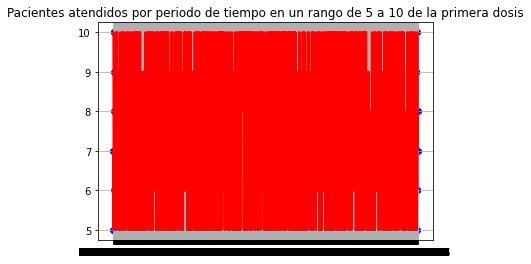

In [28]:
#x = list(dosis_1.keys())
#y = list(dosis_1.values())
datos=sorted(dosis_1.items()) # Ordenamos los datos
x, y =zip(*datos) # Obtener x(tiempo - clave) y el y(Numero de vehiculos atendidos - valor)

pp.plot(x,y,linewidth=2,color='red') #Dibujamos las lineas
pp.scatter(x,y,color='blue') # Dibujamos los puntos (x,y)
pp.title("Pacientes atendidos por periodo de tiempo en un rango de 5 a 10 de la primera dosis")
pp.grid(True) #Generamos una cuadricula
pp.show() #Mostramos el grafico


#### Reporte en graficas, para el tiempo que se toma en poner el poner la segunda dosis de vacunas

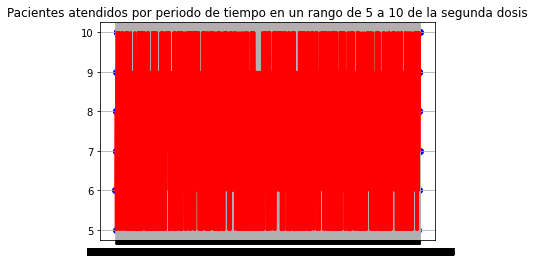

In [29]:
x2 = list(dosis_2.keys())
y2 = list(dosis_2.values())

pp.plot(x2,y2,linewidth=2,color='red')
pp.scatter(x2,y2,color='blue')
pp.title("Pacientes atendidos por periodo de tiempo en un rango de 5 a 10 de la segunda dosis")
pp.grid(True)
pp.show()

Referencias: [1] https://donde-vota.com/ecuador/azuay.htm
[2] https://simpy.readthedocs.io/en/latest/topical_guides/simpy_basics.html?__cf_chl_captcha_tk__=5f124de43fcafbfdfd6d1e13b5ed833a2f898478-1622951417-0-AdZBL6-k-3R4l8QiESKcbQO8NNM0sqfcWepZKve1agdQlDZxwSOfLMgLAQ36AcugE178tYtM2ua_c4Wzltqk1Tlt5uMbnoh38KmhhS-Bya-dEth5Ea4T70wM3ZUdxhK1VRAhkUTwp7VNB4Kxh-MqWb764nQ3b5GyefghAl-a9L7C2psOEZwP1lJDBIzyU9lZR5BI-b3vUwKV4ewae0t6zbKNuy00MRsF3cktpKld79Yba2ORsEr1mUqUOvStdG500Ictfn8jlB9tpkSj4oeJnGH8xknZ4ebELypFiwB8XuopD2Xxb4Kfxn1eWGAgCd0Pmx4dpWKD8L-BxyIRVrTTHOSiu1s_t5LuWaqTMfvmJNwDgvqM2fbAwFWkt14IZONEDZWCyh7lAKcis-6oq_EkDDvG8DLTcBxws-IUTwamfkn71bf2jVTivL8kWTcIKgeOfU2FtbBr2nuEwHLkZ21Ci9-wq4BZjL94JW4rzBxb32jZUz-mRc7trKcldEfur8GvSehpXGsvEG7UBDWoueAUuoaxAnM1r98arZXBP4I85_gSi3CmqNGltU6iL3f90GueglJeKKXyPtI-Drlq9SCNW9ThQyN1RT6mpOEIPZxFsd-Q8ZvnVTKbfKulLGL77_LhJSJw7gloQzkBNLKt8cYGlmXoI2Afz9kxeeB3j-AVNmXa